# TP 2 : prétraitement des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset('titanic')
# df.to_csv('titanic_dataset.csv', index=False)

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## étape 2 

In [7]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df = df.dropna(subset=['embarked'])
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [9]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.isna().sum()

C:\Users\moham\AppData\Local\Temp\ipykernel_20296\3480011205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [10]:
duplicates = df.duplicated()
print(f"Nombre de doublons : {duplicates.sum()}")
df = df.drop_duplicates()

Nombre de doublons : 107


## étape 3

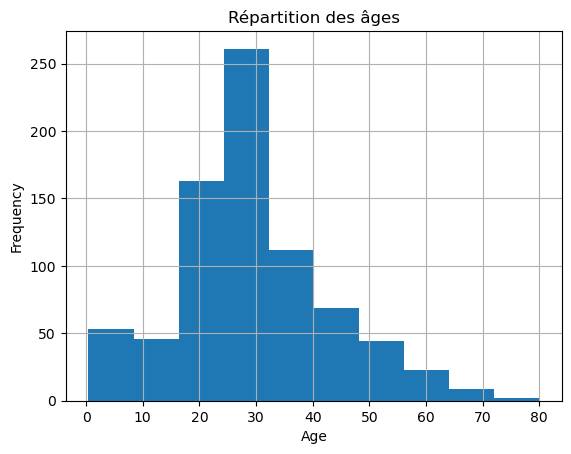

In [11]:
df['age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Répartition des âges')
plt.show()

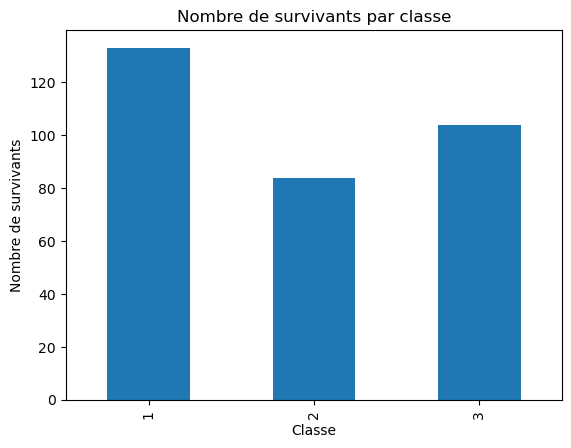

In [12]:
survivants_par_classe = df.groupby('pclass')['survived'].sum()
survivants_par_classe.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre de survivants')
plt.title('Nombre de survivants par classe')
plt.show()

## étape 4

In [13]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df = pd.get_dummies(df, columns=['embarked'], prefix='embarked')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,False,False,True
1,1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,True,False,False
2,1,3,1,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,0,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,False,True


## étape 5

In [15]:
scalerMinMax = MinMaxScaler()
df[['age']] = scalerMinMax.fit_transform(df[['age']])
df[['fare']] = scalerMinMax.fit_transform(df[['fare']])
df.head()

# scaler_Z_score = StandardScaler()
# df[['age', 'fare']] = scaler_Z_score.fit_transform(df[['age', 'fare']])
# df.head()


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,0,0.271174,1,0,0.014151,Third,man,True,NaN,Southampton,no,False,False,False,True
1,1,1,1,0.472229,1,0,0.139136,First,woman,False,C,Cherbourg,yes,False,True,False,False
2,1,3,1,0.321438,0,0,0.015469,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,1,0.434531,1,0,0.103644,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,0,0.434531,0,0,0.015713,Third,man,True,NaN,Southampton,no,True,False,False,True


## étape 6

In [16]:
X = df.drop(columns=['survived'])
y = df['survived']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)